# Lecture 8

# Data Manipulation with Pandas. Part 2

Let's import the libraries we need.

In [1]:
import pandas as pd
import numpy as np

How to work with `DataFrame` we will look using the example of a dataset on bike rides in New York.


In [2]:
df = pd.read_csv('data\citibike.csv')

Let's see how the `DataFrame` works. We often don't need to print out the entire `DataFrame`,
when we want to know its structure, what columns it contains. Let's say we're interested
look at the first 3 lines only and there is a `head` method in Pandas which is by default
returns the first 5 rows of our `DataFrame`.


In [3]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2


If we need to look not the first 3 rows of the `DataFrame`, but the last, then we can use the `tail` method, which, similarly, returns the last 5 rows by default.


In [4]:
df.tail(3)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
27,1735,7/1/2016 00:02:29,7/1/2016 00:31:24,293,Lafayette St & E 8 St,40.730287,-73.990765,174,E 25 St & 1 Ave,40.738177,-73.977387,19507,Subscriber,1992.0,1
28,209,7/1/2016 00:02:31,7/1/2016 00:06:01,410,Suffolk St & Stanton St,40.720664,-73.985180,473,Rivington St & Chrystie St,40.721101,-73.991925,25845,Subscriber,1984.0,1
29,492,7/1/2016 00:02:32,7/1/2016 00:10:44,481,S 3 St & Bedford Ave,40.712605,-73.962644,3109,Banker St & Meserole Ave,40.726060,-73.956210,23648,Subscriber,1991.0,2


In addition, we can see `DataFrame`'s dimensions

In [5]:
df.shape


(30, 15)

We also can print the name of the columns 

In [6]:
df.columns


Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

and we can also see what **data types** are in our ``DataFrame``

In [7]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

It is also possible to display not the entire ``DataFrame``, but **some columns**. To do this, we need to specify the list of the columns and pass them.


In [8]:
df[['starttime', 'start station name']].head()

,starttime,start station name
0,7/1/2016 00:00:02,W 20 St & 11 Ave
1,7/1/2016 00:00:18,Lafayette St & E 8 St
2,7/1/2016 00:00:19,N 8 St & Driggs Ave
3,7/1/2016 00:00:24,W 20 St & 11 Ave
4,7/1/2016 00:00:31,Greenwich Ave & 8 Ave


To refer to elements in Pandas implemented
methods such as `` loc`` and ``iloc``. ``iloc`` allows addressing to the elements by **implicit** index.
Let's say, if we need to pull out the values stored in the very last line, we
we can specify the index -1 in ``iloc``, and the last line will be returned.


In [9]:
df.iloc[-1]


tripduration                                    492
starttime                         7/1/2016 00:02:32
stoptime                          7/1/2016 00:10:44
start station id                                481
start station name             S 3 St & Bedford Ave
start station latitude                      40.7126
start station longitude                    -73.9626
end station id                                 3109
end station name           Banker St & Meserole Ave
end station latitude                        40.7261
end station longitude                      -73.9562
bikeid                                        23648
usertype                                 Subscriber
birth year                                     1991
gender                                            2
Name: 29, dtype: object

In [10]:
df.iloc[[-1]]


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
29,492,7/1/2016 00:02:32,7/1/2016 00:10:44,481,S 3 St & Bedford Ave,40.712605,-73.962644,3109,Banker St & Meserole Ave,40.72606,-73.95621,23648,Subscriber,1991.0,2


The``loc`` method differs  from ``iloc`` in that we can specify slices by label.


In [11]:
df.loc[1,'tripduration']


492

In [12]:
df.loc[1,['tripduration']]

tripduration    492
Name: 1, dtype: object

If we want to filter using the ``iloc`` method, specifying the boundaries, then we do not include
boundary values. The ``loc`` method works in other way - it includes boundary values. Compare


In [13]:
df.iloc[0:6,0:4]

,tripduration,starttime,stoptime,start station id
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284
5,672,7/1/2016 00:00:45,7/1/2016 00:11:57,459


In [14]:
df.loc[0:6, 'tripduration':'start station longitude']

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638
5,672,7/1/2016 00:00:45,7/1/2016 00:11:57,459,W 20 St & 11 Ave,40.746745,-74.007756
6,466,7/1/2016 00:00:49,7/1/2016 00:08:35,128,MacDougal St & Prince St,40.727103,-74.002971


Often, when working with a `DataFrame`, we are faced with the fact that we need to select some rows satisfying some conditions.
How can I do that? We need to create a mask that will be our condition and pass it as an index to our `DataFrame`. You can also create multiple conditions for filtration.


In [15]:
df[(df['tripduration'] < 1000) & (df['usertype'] == 'Subscriber')].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
5,672,7/1/2016 00:00:45,7/1/2016 00:11:57,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,15444,Subscriber,1991.0,1
6,466,7/1/2016 00:00:49,7/1/2016 00:08:35,128,MacDougal St & Prince St,40.727103,-74.002971,250,Lafayette St & Jersey St N,40.724561,-73.995653,14676,Subscriber,1989.0,1
7,556,7/1/2016 00:00:51,7/1/2016 00:10:07,433,E 13 St & Avenue A,40.729554,-73.980572,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,25755,Subscriber,1989.0,1


In addition to filtering, Pandas implements several methods that allow you to view statistics for the entire `DataFrame`. For example, using the `describe` method, you can see the average, maximum, minimum value for all columns at once.


In [16]:
df.describe()


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,25.000000,30.000000
mean,797.466667,529.433333,40.731871,-73.992881,573.700000,40.733723,-73.989227,20263.033333,1984.120000,1.066667
std,558.310860,714.275021,0.018098,0.017158,697.392639,0.015794,0.014889,4047.818548,7.149126,0.639684
min,191.000000,127.000000,40.690893,-74.009447,174.000000,40.689888,-74.008591,14676.000000,1966.000000,0.000000
25%,464.500000,269.000000,40.723604,-74.006474,329.500000,40.724936,-74.001034,16399.750000,1981.000000,1.000000
50%,582.500000,359.500000,40.730380,-73.998004,437.000000,40.734048,-73.990506,19944.000000,1986.000000,1.000000
75%,1053.000000,459.000000,40.744569,-73.987734,499.250000,40.743291,-73.981754,24031.250000,1989.000000,1.000000
max,2229.000000,3150.000000,40.775369,-73.948034,3109.000000,40.765849,-73.952123,25925.000000,1994.000000,2.000000


Quantile is a value that a given random variable does not exceed with a fixed probability. If the probability is given as a percentage, then the quantile is called the percentile. Accordingly, the median is at the 50th percentile, and the first and third quartiles are at the 25th and 75th percentiles, respectively. For example, the phrase "75% quantile for tripduration is 1053" means that 75% of trips last no more than 1053 seconds, and 25% of trips last, respectively, more than 1053 seconds.


Since our `DataFrame` stores not only numeric, but also categorical entities, using the `describe` method, we can also see statistics on them, but you need to specify what type of data we want to see.


In [17]:
df.describe(include=[np.object])

,starttime,stoptime,start station name,end station name,usertype
count,30,30,30,30,30
unique,27,30,23,26,2
top,7/1/2016 00:01:54,7/1/2016 00:11:52,W 20 St & 11 Ave,Greenwich St & W Houston St,Subscriber
freq,2,1,3,3,25


The `top` is the most common value. The `freq` is the most common value’s frequency. 

In [18]:
df.describe(include='all') 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,30.000000,30,30,30.000000,30,30.000000,30.000000,30.000000,30,30.000000,30.000000,30.000000,30,25.000000,30.000000
unique,NaN,27,30,NaN,23,NaN,NaN,NaN,26,NaN,NaN,NaN,2,NaN,NaN
top,NaN,7/1/2016 00:01:54,7/1/2016 00:11:52,NaN,W 20 St & 11 Ave,NaN,NaN,NaN,Greenwich St & W Houston St,NaN,NaN,NaN,Subscriber,NaN,NaN
freq,NaN,2,1,NaN,3,NaN,NaN,NaN,3,NaN,NaN,NaN,25,NaN,NaN
mean,797.466667,NaN,NaN,529.433333,NaN,40.731871,-73.992881,573.700000,NaN,40.733723,-73.989227,20263.033333,NaN,1984.120000,1.066667
std,558.310860,NaN,NaN,714.275021,NaN,0.018098,0.017158,697.392639,NaN,0.015794,0.014889,4047.818548,NaN,7.149126,0.639684
min,191.000000,NaN,NaN,127.000000,NaN,40.690893,-74.009447,174.000000,NaN,40.689888,-74.008591,14676.000000,NaN,1966.000000,0.000000
25%,464.500000,NaN,NaN,269.000000,NaN,40.723604,-74.006474,329.500000,NaN,40.724936,-74.001034,16399.750000,NaN,1981.000000,1.000000
50%,582.500000,NaN,NaN,359.500000,NaN,40.730380,-73.998004,437.000000,NaN,40.734048,-73.990506,19944.000000,NaN,1986.000000,1.000000
75%,1053.000000,NaN,NaN,459.000000,NaN,40.744569,-73.987734,499.250000,NaN,40.743291,-73.981754,24031.250000,NaN,1989.000000,1.000000


In [19]:
df[['starttime']].describe()

,starttime
count,30
unique,27
top,7/1/2016 00:01:54
freq,2


In [20]:
df.describe(percentiles=[0.1,0.5,0.9],exclude=[np.float64]) 

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,gender
count,30.000000,30,30,30.000000,30,30.000000,30,30.000000,30,30.000000
unique,NaN,27,30,NaN,23,NaN,26,NaN,2,NaN
top,NaN,7/1/2016 00:01:54,7/1/2016 00:11:52,NaN,W 20 St & 11 Ave,NaN,Greenwich St & W Houston St,NaN,Subscriber,NaN
freq,NaN,2,1,NaN,3,NaN,3,NaN,25,NaN
mean,797.466667,NaN,NaN,529.433333,NaN,573.700000,NaN,20263.033333,NaN,1.066667
std,558.310860,NaN,NaN,714.275021,NaN,697.392639,NaN,4047.818548,NaN,0.639684
min,191.000000,NaN,NaN,127.000000,NaN,174.000000,NaN,14676.000000,NaN,0.000000
10%,325.800000,NaN,NaN,154.100000,NaN,246.200000,NaN,15507.000000,NaN,0.000000
50%,582.500000,NaN,NaN,359.500000,NaN,437.000000,NaN,19944.000000,NaN,1.000000
90%,1584.700000,NaN,NaN,516.200000,NaN,540.000000,NaN,25758.300000,NaN,2.000000


Also, when we work, for example, with categorical features, we want to know the ratio of some values. And this can be done using the `value_counts` method.

In [21]:
df['usertype'].value_counts()

Subscriber    25
Customer       5
Name: usertype, dtype: int64

In [22]:
df['usertype'].value_counts(normalize=True)

Subscriber    0.833333
Customer      0.166667
Name: usertype, dtype: float64

In [23]:
df['usertype'].count()

30

And you can also see the number of
unique values in some `Series`. This can be done using the `unique` method.



In [24]:
df['start station name'].unique()


array(['W 20 St & 11 Ave', 'Lafayette St & E 8 St', 'N 8 St & Driggs Ave',
       'Greenwich Ave & 8 Ave', 'MacDougal St & Prince St',
       'E 13 St & Avenue A', 'W 11 St & 6 Ave', 'W 43 St & 10 Ave',
       'Fulton St & Broadway', 'Franklin Ave & Myrtle Ave',
       'Maiden Ln & Pearl St', 'E 85 St & York Ave', '6 Ave & Canal St',
       'Greenwich St & W Houston St', 'E 33 St & 2 Ave',
       'Henry St & Atlantic Ave', 'W 22 St & 8 Ave', '8 Ave & W 33 St',
       'W 33 St & 7 Ave', 'E 11 St & 2 Ave', 'Barrow St & Hudson St',
       'Suffolk St & Stanton St', 'S 3 St & Bedford Ave'], dtype=object)

For number of unique values is `nunique ()` method


In [25]:
df['start station name'].nunique()

23

You can also find the correlation between columns of the dataset if they are numeric using the method `corr`.

$$ r_{xy}=\frac{\sum \left (  x_{i} -\bar{x}\right )\times \left (  y_{i} -\bar{y}\right )}{\sqrt{\sum \left (  x_{i} -\bar{x}\right )^{2}\times \left (  y_{i} -\bar{y}\right )^{2}}} $$


In [26]:
df.corr().head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
tripduration,1.000000,0.005958,0.279717,-0.155065,-0.208088,0.443372,-0.015035,-0.083743,0.220732,-0.228435
start station id,0.005958,1.000000,0.289613,0.678618,0.492051,-0.049569,0.416501,-0.000742,0.201254,0.174797
start station latitude,0.279717,0.289613,1.000000,-0.020152,-0.220959,0.529299,-0.228736,0.056788,0.369665,-0.214625
start station longitude,-0.155065,0.678618,-0.020152,1.000000,0.559629,-0.161206,0.728681,0.312968,0.119667,0.332913
end station id,-0.208088,0.492051,-0.220959,0.559629,1.000000,-0.110345,0.693786,0.032875,0.154493,0.424481


Creation correlation heatmap

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For whole `DataFrame`

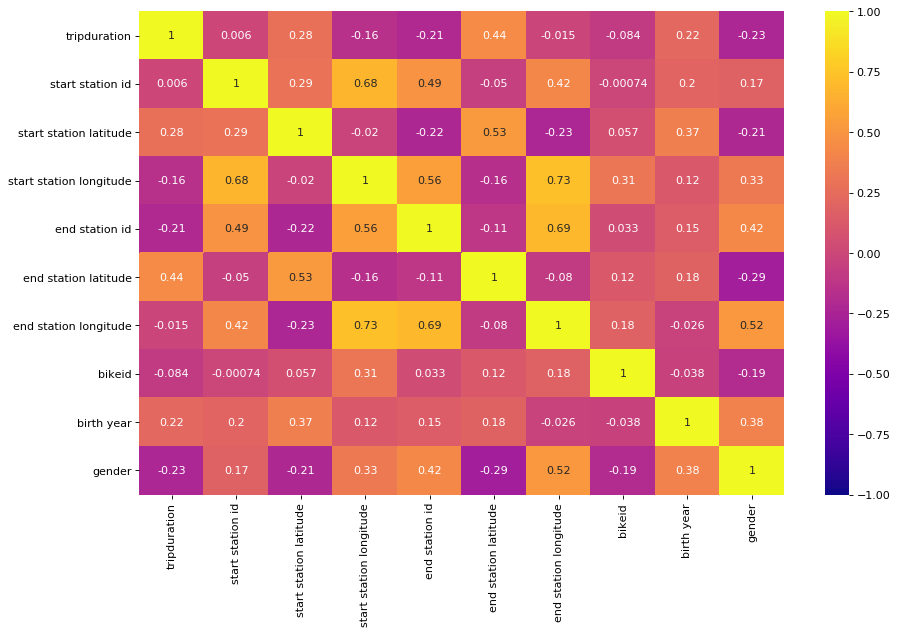

In [28]:
plt.figure(figsize=(13,8), dpi= 80)
sns.heatmap(df.corr(),annot=True, fmt='.2g', vmin=-1, 
            vmax=1, cmap= 'plasma')

plt.show();

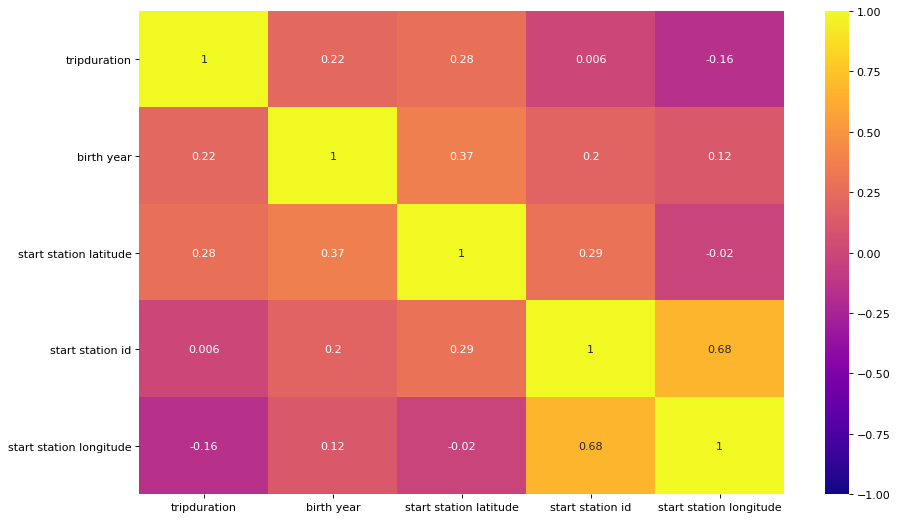

In [29]:
plt.figure(figsize=(13,8), dpi= 80)
sns.heatmap(df[['tripduration','birth year','start station latitude','start station id','start station longitude']].corr(),annot=True, fmt='.2g', vmin=-1, 
            vmax=1, cmap= 'plasma')

plt.show();

In addition, it happens that you need to make some kind of sample from the original `DataFrame` (if
we, for example, have a very large `DataFrame`, and we want to keep some small part).
This can be done using the `sample` method, which will select some fraction from the original
`DataFrame`.

Using number of items:



In [30]:
df.sample(5)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
18,464,7/1/2016 00:01:56,7/1/2016 00:09:41,527,E 33 St & 2 Ave,40.744023,-73.976056,504,1 Ave & E 16 St,40.732219,-73.981656,17010,Subscriber,1987.0,2
5,672,7/1/2016 00:00:45,7/1/2016 00:11:57,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,15444,Subscriber,1991.0,1
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2


Using fraction of axis items to return

In [31]:
df.sample(frac=0.1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
22,2229,7/1/2016 00:02:04,7/1/2016 00:39:14,453,W 22 St & 8 Ave,40.744751,-73.999154,423,W 54 St & 9 Ave,40.765849,-73.986905,21035,Customer,NaN,0
6,466,7/1/2016 00:00:49,7/1/2016 00:08:35,128,MacDougal St & Prince St,40.727103,-74.002971,250,Lafayette St & Jersey St N,40.724561,-73.995653,14676,Subscriber,1989.0,1
19,419,7/1/2016 00:01:59,7/1/2016 00:08:58,128,MacDougal St & Prince St,40.727103,-74.002971,435,W 21 St & 6 Ave,40.741740,-73.994156,18069,Subscriber,1992.0,2


Save `DataFrame` to csv file

In [32]:
df.to_csv('path_to_file.csv')


## Data grouping


Let's talk about how you can group data in Pandas, and how you can manipulate the received groups. Let's say we have some variable, it takes 2 or may have several values, and we want to select all rows in which only the first value occurs, only the second, and so on. This can be done using the `groupby` method, then, after we have selected a certain group, we can  work with it separately, see the distribution of other features for this group, and we can also compare these groups with each other. Let's see how this can be done in Pandas.


In [33]:

df.groupby(['usertype'])


And to see what groups you get, you can use the `groups` attribute



In [34]:
df.groupby(['usertype']).groups

{'Customer': Int64Index([0, 3, 4, 15, 22], dtype='int64'),
 'Subscriber': Int64Index([ 1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
             21, 23, 24, 25, 26, 27, 28, 29],
            dtype='int64')}


And then, in addition to such a representation in the form of indices, we can see which
specifically, the values and rows we meet in the group. To do this, you can, for example, see the first lines from each group by calling the `first` method.



In [35]:
df.groupby(['usertype']).first()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender
usertype,,,,,,,,,,,,,,
Customer,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,NaN,0
Subscriber,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,1984.0,1


And now that we already have some grouped structure, we can count some distribution of values. Let's say we want to see the average travel times for each user group.
We also group the data, and then we specify the list of values needed for aggregation, and then the method we want, by which we actually we aggregate data, for example, the average duration of trips.

In [36]:
df.groupby(['usertype'])[['tripduration']].mean()


,tripduration
usertype,
Customer,952.40
Subscriber,766.48


We return some `DataFrame`, and also, if we specify not
a list of values, but only one value, in this case, we have
an object of type `Series`.


In [37]:
df.groupby(['usertype'])['tripduration'].mean()

usertype
Customer      952.40
Subscriber    766.48
Name: tripduration, dtype: float64

Pandas also allows you to group data not only by any one criterion, but
by a group of criterion. To do this, we just need to add another additional
column to method `groupby`



In [38]:
df.groupby(['usertype','gender'])[['tripduration']].mean()

tripduration
usertype   gender              
Customer   0         952.400000
Subscriber 1         842.833333
           2         570.142857

In [39]:

df.groupby(['usertype','gender'])[['tripduration']].mean()[1:3].unstack()

tripduration            
gender                1           2
usertype                           
Subscriber   842.833333  570.142857

After grouping the Pandas data, we can read some aggregated value by attributes for each group, but if we are interested in any distribution of the value not only by one attribute, but by several ones at once, then this can be done using the `agg` method.



In [40]:
df.groupby(['usertype']).agg({'tripduration':sum, 'starttime':'first'})

,tripduration,starttime
usertype,,
Customer,4762,7/1/2016 00:00:02
Subscriber,19162,7/1/2016 00:00:18


Also, if we need to look at the change in values or any
other metrics for some one criterion, we can specify the list of methods as the value in the same dictionary, for this columns.


In [41]:
df.groupby(['usertype']).agg({'tripduration':[sum, min], 'starttime':'first'})

tripduration               starttime
                    sum  min              first
usertype                                       
Customer           4762  533  7/1/2016 00:00:02
Subscriber        19162  191  7/1/2016 00:00:18




Let's also consider the option when we want to calculate some value, not
using built-in functions, but using some function of our own. It can be done,
for example using a `lambda` function.

In [42]:
df.groupby(['usertype']).agg({'tripduration': lambda x: max(x)/60, 'starttime':'first'})

,tripduration,starttime
usertype,,
Customer,37.15,7/1/2016 00:00:02
Subscriber,36.65,7/1/2016 00:00:18


Rename columns 

In [43]:
df.rename(columns={'gender':'sex'}, inplace=True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,sex
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


#### More examples

Download a larger dataset.

**This dataset is too large for GitHub. The link for this dataset** - https://iiiii-my.sharepoint.com/:u:/g/personal/svitlana_kovalenko_khpi_edu_ua/Eclssw_8jslCn0WEsRIipdYBs3AdUm8r_B3zAGlAn7l9sQ?e=kQInoE

In [45]:
df = pd.read_csv('data\citibike-tripdata.csv')

Find its shape

In [ ]:
df.shape

Find the average trip duration in minutes ('tripduration' column) with the precision upto 2 decimal places

In [46]:
df['tripduration_min'] = df['tripduration']/60
round(df.describe()['tripduration_min']['mean'], 2)

16.13

Another way

In [47]:
round(df['tripduration_min'].mean(), 2)

16.13

How many trips started and ended at the same station?

In [48]:
df[(df['start station id'] == df['end station id'])].shape[0]

41364

For trips that started and ended at the same station, calculate the number of unique bikes

In [49]:
df[(df['start station id'] == df['end station id'])]['bikeid'].unique().shape[0]

9939

What's the most used bike (bikeid) in the city in terms of rides?

In [50]:
df['bikeid'].value_counts()[:1].values[0]

559

Find a bike (bikeid) that has longer rides on average than everyone else

In [51]:
df.groupby('bikeid')['tripduration'].mean().sort_values(ascending=False)[:1].index[0]

17548

What is the average trip duration per subscription type, down to 2 decimal places?

In [52]:
round(df.groupby('usertype')['tripduration'].mean(),2)

usertype
Customer      2004.92
Subscriber     799.94
Name: tripduration, dtype: float64

For each station, find the distance between stations, and then find the average distance across all trips, having previously droped closed paths (those with the same start station id = end station id).

Hint: you can use the `geopy` library and take the `distance` (the minimum distance between points)

In [53]:
from geopy.distance import distance

In [54]:
df = pd.read_csv('..\data\citibike.csv')

In [55]:
df['distance_km'] = df.apply(lambda x: distance((x['start station latitude'], 
                                                 x['start station longitude']),
                                                (x['end station latitude'], 
                                                 x['end station longitude'])).kilometers, axis=1)

print(df['distance_km'].mean())

1.7742745629520018


Find the distance of the shortest trip

In [56]:
df['distance_km'].min()

0.17308291372640913